## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [2]:
#Setting up environment with initial libraries needed for importing, cleaning, and initial visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

# Read the King's County dataframe with Pandas and assign it to the variable df
df = pd.read_csv('kc_house_data.csv')
# Make sure everytingh has been imported correctly and get a first look at the top five rows of data
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [3]:
duplicate_rows = df[df.duplicated()]
print(f"The are {len(duplicate_rows)} duplicate rows")

The are 0 duplicate rows


In [4]:
duplicate_id = df[df.duplicated('id')]
print(f'There are {len(duplicate_id)} duplicate values of id, ' 
      f'which represent {round(len(duplicate_id)/len(df),3)}% of all entries.')

There are 177 duplicate values of id, which represent 0.008% of all entries.


In [5]:
for col in df:
    v = df[col].isna().sum()
    if v > 0:
        print(f'{col} has {v} missing values.')

waterfront has 2376 missing values.
view has 63 missing values.
yr_renovated has 3842 missing values.


In [6]:
df.zipcode.value_counts(normalize = True)

98103    0.027874
98038    0.027272
98115    0.026994
98052    0.026578
98117    0.025605
           ...   
98102    0.004815
98010    0.004630
98024    0.003704
98148    0.002639
98039    0.002315
Name: zipcode, Length: 70, dtype: float64

#### Continue dealing with missing values

In [7]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

In [8]:
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006575
6/26/2014    0.006066
6/25/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.5    

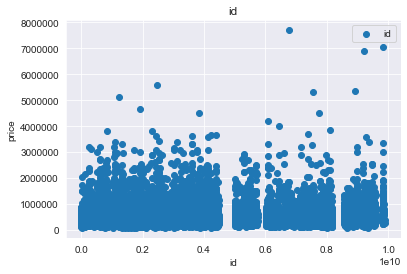

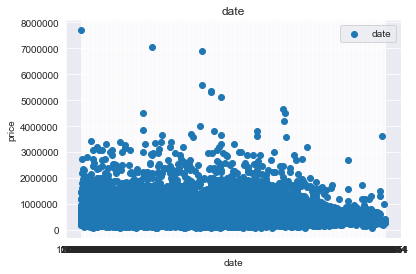

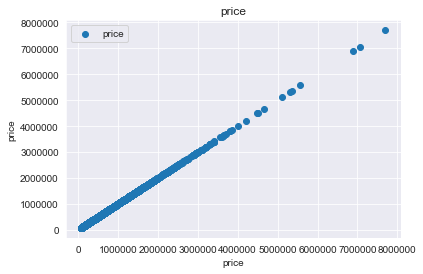

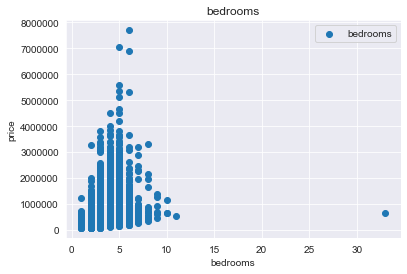

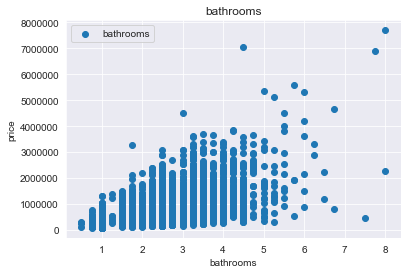

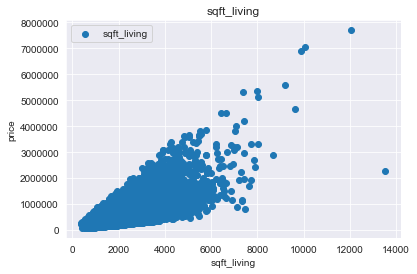

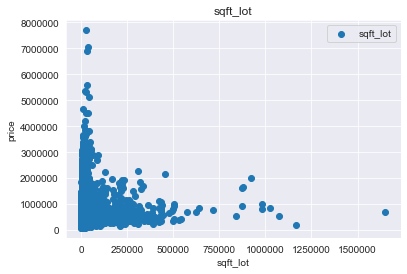

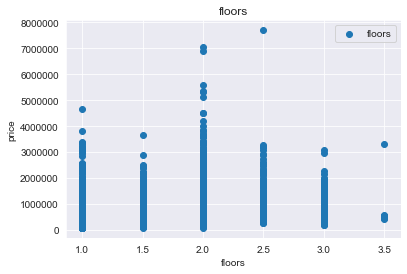

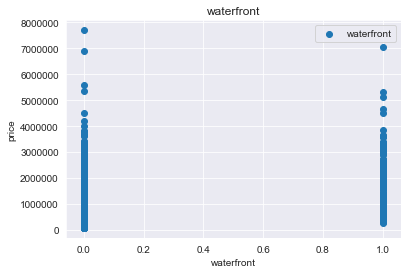

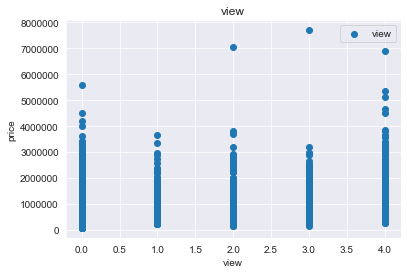

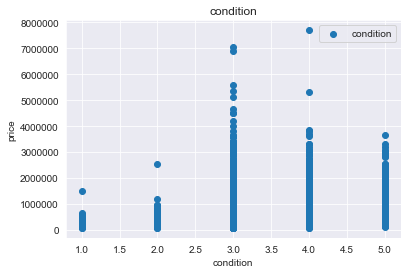

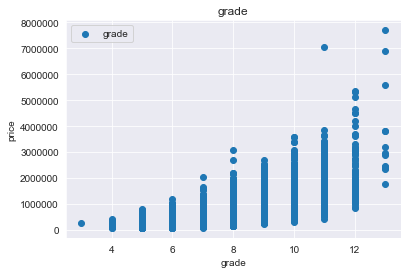

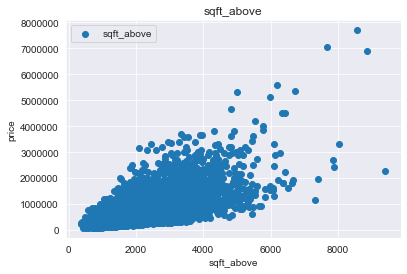

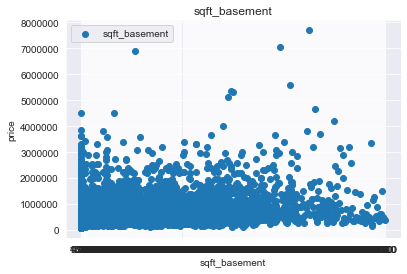

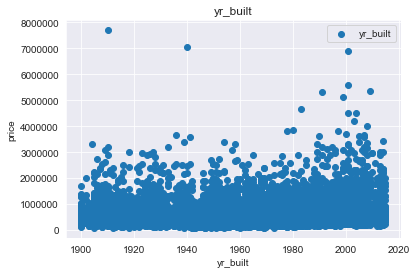

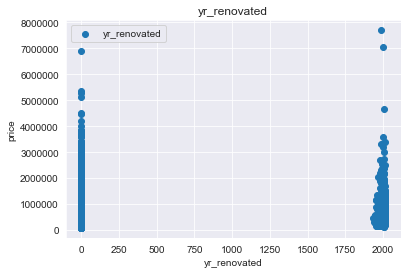

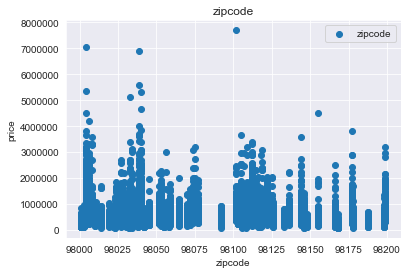

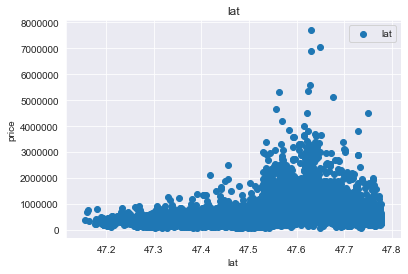

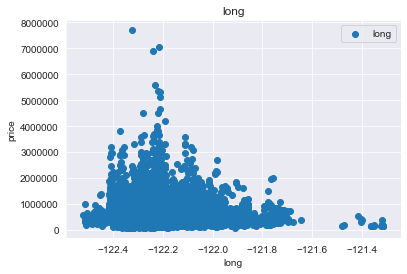

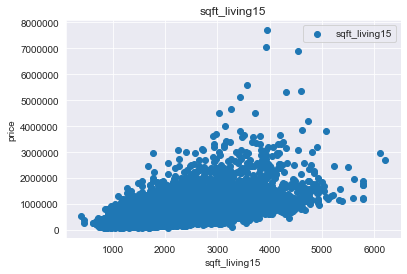

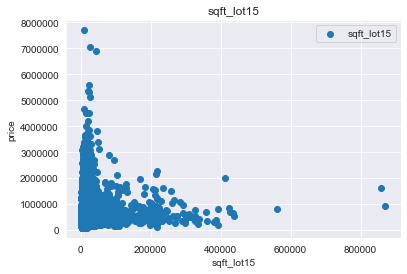

In [9]:
for col in df.columns: 
    plt.scatter(df[col], df.price, label=col)
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(col)
    plt.show()

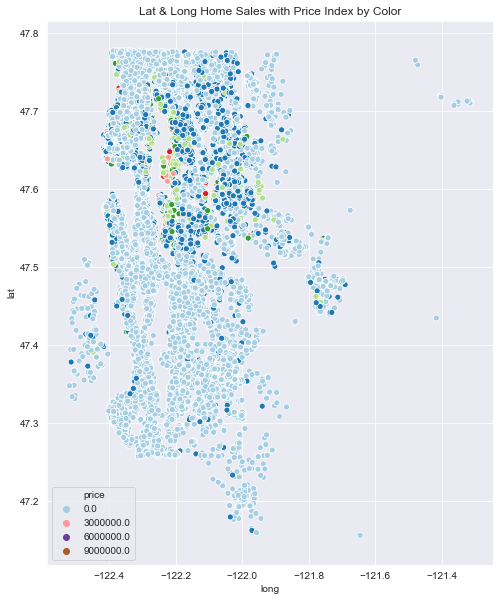

In [10]:
plt.figure(figsize=(8,10))
sns.scatterplot(x='long', y='lat', hue='price', data=df, palette='Paired')
plt.title('Lat & Long Home Sales with Price Index by Color')
plt.legend(fancybox=True);

In [11]:
df2 = df.groupby(by = 'zipcode').mean()

In [12]:
df2.shape

(70, 18)

In [13]:
df2.head()

id         price  bedrooms  bathrooms  sqft_living  \
zipcode                                                                 
98001    4.651274e+09  2.811949e+05  3.393352   2.011773  1903.783934   
98002    4.850894e+09  2.342840e+05  3.326633   1.839196  1627.743719   
98003    4.674182e+09  2.941113e+05  3.357143   2.047321  1928.882143   
98004    4.394237e+09  1.356524e+06  3.854890   2.527603  2909.022082   
98005    4.961872e+09  8.102897e+05  3.851190   2.424107  2656.803571   

             sqft_lot    floors  waterfront      view  condition     grade  \
zipcode                                                                      
98001    14967.002770  1.430748    0.000000  0.094708   3.335180  7.296399   
98002     7517.633166  1.334171    0.000000  0.010050   3.743719  6.693467   
98003    10603.096429  1.310714    0.000000  0.214286   3.371429  7.542857   
98004    13104.220820  1.432177    0.003534  0.306962   3.495268  8.687697   
98005    19928.785714  1.279762    0.000000  0.095238   3.696429  8.488095   

          sqft_above     yr_built  yr_renovated        lat        long  \
zipcode                                                                  
98001    1723.756233  1980.867036     28.038732  47.309106 -122.270704   
98002    1522.537688  1967.773869     60.212121  47.308780 -122.213357   
98003    1663.550000  1976.885714     16.641667  47.315741 -122.310054   
98004    2419.842271  1971.470032    213.759542  47.616183 -122.205189   
98005    2160.196429  1969.744048     57.985507  47.611532 -122.167268   

         sqft_living15    sqft_lot15  
zipcode                               
98001      1830.099723  11218.875346  
98002      1479.030151   7585.482412  
98003      1876.196429   9746.178571  
98004      2674.700315  12805.022082  
98005      2567.863095  18367.773810

In [14]:
cats = []
conts = []

for col in df.columns:
    if df[col].nunique() <= 75:
        cats.append(col)
    else:
        conts.append(col)
        
print(cats)
print(conts)

['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_renovated', 'zipcode']
['id', 'date', 'price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


id         price   sqft_living      sqft_lot    sqft_above  \
count  2.159700e+04  2.159700e+04  21597.000000  2.159700e+04  21597.000000   
mean   4.580474e+09  5.402966e+05   2080.321850  1.509941e+04   1788.596842   
std    2.876736e+09  3.673681e+05    918.106125  4.141264e+04    827.759761   
min    1.000102e+06  7.800000e+04    370.000000  5.200000e+02    370.000000   
25%    2.123049e+09  3.220000e+05   1430.000000  5.040000e+03   1190.000000   
50%    3.904930e+09  4.500000e+05   1910.000000  7.618000e+03   1560.000000   
75%    7.308900e+09  6.450000e+05   2550.000000  1.068500e+04   2210.000000   
max    9.900000e+09  7.700000e+06  13540.000000  1.651359e+06   9410.000000   

           yr_built           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean    1970.999676     47.560093   -122.213982    1986.620318   12758.283512  
std       29.375234      0.138552      0.140724     685.230472   27274.441950  
min     1900.000000     47.155900   -122.519000     399.000000     651.000000  
25%     1951.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%     1975.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%     1997.000000     47.678000   -122.125000    2360.000000   10083.000000  
max     2015.000000     47.777600   -121.315000    6210.000000  871200.000000

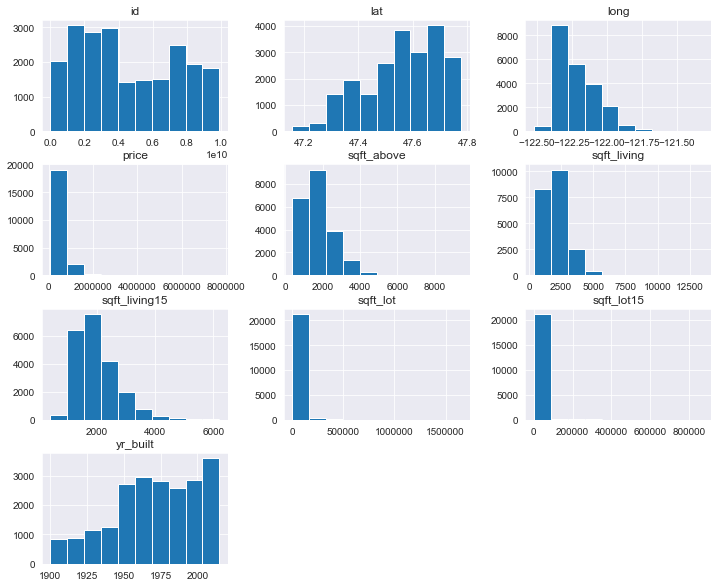

In [15]:
df_conts = df.loc[:,conts]
df_conts.hist(figsize=(12,10))
df_conts.describe()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

outcome = 'price'

x_cols = df.drop(['price', 'date','sqft_basement', 'id'], axis=1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

model = smf.ols(formula=f, data=df).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                   OLS                   Adj. R-squared:          0.701      
Dependent Variable:      price                 AIC:                     430090.8562
Date:                    2020-07-14 15:13      BIC:                     430228.8327
No. Observations:        15762                 Log-Likelihood:          -2.1503e+05
Df Model:                17                    F-statistic:             2174.      
Df Residuals:            15744                 Prob (F-statistic):      0.00       
R-squared:               0.701                 Scale:                   4.1441e+10 
-----------------------------------------------------------------------------------
                 Coef.       Std.Err.      t     P>|t|      [0.025        0.975]   
-----------------------------------------------------------------------------------
Intercept     5302250.8039 3478624.8563   1.5242 0.1275 -1516252.8213 12120754.4290
bedrooms       -37498.7849    2219.5646 -16.8947 0.0000   -41849.3860   -33148.1838
bathrooms       44686.0252    3864.2123  11.5641 0.0000    37111.7259    52260.3245
sqft_living       154.5053       5.1688  29.8917 0.0000      144.3738      164.6369
sqft_lot            0.0939       0.0562   1.6698 0.0950       -0.0163        0.2040
floors           4029.0029    4268.3982   0.9439 0.3452    -4337.5471    12395.5529
waterfront     609833.7233   20547.6719  29.6790 0.0000   569557.9301   650109.5165
view            52830.6894    2552.7403  20.6957 0.0000    47827.0257    57834.3532
condition       26532.2196    2785.4886   9.5252 0.0000    21072.3426    31992.0966
grade           93751.2669    2570.6596  36.4697 0.0000    88712.4792    98790.0546
sqft_above         38.2463       5.1380   7.4439 0.0000       28.1753       48.3173
yr_built        -2674.2510      85.9581 -31.1111 0.0000    -2842.7386    -2505.7633
yr_renovated       19.8281       4.3677   4.5397 0.0000       11.2668       28.3894
zipcode          -571.0855      39.0778 -14.6141 0.0000     -647.6824     -494.4886
lat            604021.2106   12695.4957  47.5776 0.0000   579136.5833   628905.8380
long          -217438.3999   15570.8080 -13.9645 0.0000  -247958.9691  -186917.8307
sqft_living15      15.6360       4.1095   3.8049 0.0001        7.5810       23.6911
sqft_lot15         -0.3382       0.0846  -3.9975 0.0001       -0.5041       -0.1724
-----------------------------------------------------------------------------------
Omnibus:                  13694.698          Durbin-Watson:             1.980      
Prob(Omnibus):            0.000              Jarque-Bera (JB):          1491014.115
Skew:                     3.668              Prob(JB):                  0.000      
Kurtosis:                 50.080             Condition No.:             216078398  
===================================================================================
* The condition number is large (2e+08). This might indicate             strong
multicollinearity or other numerical problems.
"""

## Dealing with Grade and Dates by binning

In [4]:
bins = [7, 9, 13]
bins_grd = pd.cut(df['grade'], bins)
bins_grd = bins_grd.cat.as_ordered()
bins_grd.head()

0           NaN
1           NaN
2           NaN
3           NaN
4    (7.0, 9.0]
Name: grade, dtype: category
Categories (2, interval[int64]): [(7, 9] < (9, 13]]

Text(0.5, 1.0, 'Grade Bins')

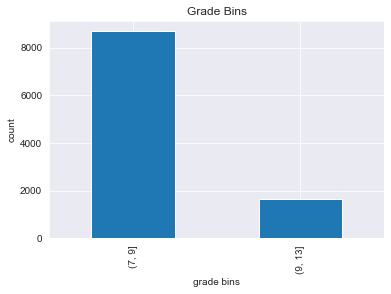

In [5]:
bins_grd.value_counts().plot(kind='bar')
plt.xlabel('grade bins')
plt.ylabel('count')
plt.title('Grade Bins')

In [20]:
df['grade']=bins_grd
df['grade'] = df['grade'].cat.codes
grd_dummy = pd.get_dummies(bins_grd, prefix='grd')
df2 = df.drop(['grade'], axis=1)
df2 = pd.concat([df, grd_dummy], axis=1)
df2.head(2)

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   

   sqft_lot  floors  waterfront  view  ...  yr_renovated  zipcode      lat  \
0      5650     1.0         NaN   0.0  ...           0.0    98178  47.5112   
1      7242     2.0         0.0   0.0  ...        1991.0    98125  47.7210   

      long  sqft_living15  sqft_lot15  grd_(3, 5]  grd_(5, 7]  grd_(7, 9]  \
0 -122.257           1340        5650           0           1           0   
1 -122.319           1690        7639           0           1           0   

   grd_(9, 13]  
0            0  
1            0  

[2 rows x 25 columns]

In [21]:
df_dv2 = df2.rename(columns={
       'grd_(3, 5]':'grd1', 'grd_(5, 7]':'grd2', 'grd_(7, 9]':'grd3', 'grd_(9, 13]':'grd4'})

In [22]:
outcome = 'price'

x_cols = df_dv2.drop(['price','date','sqft_basement', 'id', 'grade'], axis=1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

model = smf.ols(formula=f, data=df_dv2).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
==================================================================================
Model:                    OLS                  Adj. R-squared:         0.698      
Dependent Variable:       price                AIC:                    430244.6953
Date:                     2020-07-14 15:13     BIC:                    430405.6678
No. Observations:         15762                Log-Likelihood:         -2.1510e+05
Df Model:                 20                   F-statistic:            1823.      
Df Residuals:             15741                Prob (F-statistic):     0.00       
R-squared:                0.698                Scale:                  4.1840e+10 
----------------------------------------------------------------------------------
                 Coef.       Std.Err.      t     P>|t|      [0.025       0.975]   
----------------------------------------------------------------------------------
Intercept     1494327.1040 3500824.7089   0.4269 0.6695 -5367690.8787 8356345.0866
bedrooms       -34412.7871    2250.1943 -15.2933 0.0000   -38823.4261  -30002.1481
bathrooms       50557.4857    3882.3860  13.0223 0.0000    42947.5639   58167.4076
sqft_living       165.7832       5.1592  32.1334 0.0000      155.6705     175.8958
sqft_lot            0.0787       0.0565   1.3923 0.1639       -0.0321       0.1895
floors          16464.4296    4342.4751   3.7915 0.0002     7952.6804   24976.1788
waterfront     579846.0920   20658.1722  28.0686 0.0000   539353.7049  620338.4791
view            55977.3166    2562.4818  21.8450 0.0000    50954.5584   61000.0747
condition       31006.5877    2801.7975  11.0667 0.0000    25514.7433   36498.4322
sqft_above         36.9575       5.1784   7.1368 0.0000       26.8072      47.1078
yr_built        -2091.1564      86.1106 -24.2845 0.0000    -2259.9430   -1922.3698
yr_renovated       28.9611       4.3971   6.5865 0.0000       20.3424      37.5799
zipcode          -613.1385      39.2521 -15.6205 0.0000     -690.0771    -536.2000
lat            646405.4010   12690.2787  50.9371 0.0000   621530.9992  671279.8029
long          -262689.3920   15577.9179 -16.8629 0.0000  -293223.8979 -232154.8861
sqft_living15      32.8483       4.0907   8.0300 0.0000       24.8301      40.8665
sqft_lot15         -0.3383       0.0851  -3.9774 0.0001       -0.5050      -0.1716
grd1          -214404.7578  205216.8426  -1.0448 0.2961  -616653.3081  187843.7926
grd2          -201940.7672  204746.0368  -0.9863 0.3240  -603266.4842  199384.9498
grd3          -150788.5005  204819.5658  -0.7362 0.4616  -552258.3428  250681.3418
grd4           109780.6469  205039.9471   0.5354 0.5924  -292121.1681  511682.4618
----------------------------------------------------------------------------------
Omnibus:                 13286.408          Durbin-Watson:             1.989      
Prob(Omnibus):           0.000              Jarque-Bera (JB):          1416170.587
Skew:                    3.490              Prob(JB):                  0.000      
Kurtosis:                48.909             Condition No.:             216422122  
==================================================================================
* The condition number is large (2e+08). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [23]:
import datetime as dt

df['date'] = pd.to_datetime(df['date'])
df['day_of_year'] = df['date'].dt.dayofyear
df['month'] = df['date'].dt.month
display(df.day_of_year.values,df.month.values)

array([286, 343,  56, ..., 174,  16, 288])

array([10, 12,  2, ...,  6,  1, 10])

In [24]:
# bins = [0, 3, 6, 9, 12]
# bins_mnth = pd.cut(df['grade'], bins)
# bins_mnth = bins_mnth.cat.as_ordered()
# bins_mnth.head()
# df = pd.concat([df, mnth_dummy], axis=1)

In [25]:
# bins_mnth.value_counts().plot(kind='bar')
# plt.xlabel('month bins')
# plt.ylabel('count')
# plt.title('Month Bins')

In [26]:
# df['month']= bins_mnth
# df['month'] = df['month'].cat.codes
# mnth_dummy = pd.get_dummies(bins_mnth, prefix='season')
# df = df.drop(['month'], axis=1)
# df = pd.concat([df, mnth_dummy], axis=1)
# df.head(2)

In [27]:
df_dv2 = df.rename(columns={
       'grd_(3, 5]':'grd1', 'grd_(5, 7]':'grd2', 'grd_(7, 9]':'grd3', 'grd_(9, 13]':'grd4'})
#        'season_(0, 3]':'season1', 'season_(3, 6]':'season2', 'season_(6, 9]':'season3', 'season_(9, 12]':'season4'

In [28]:
df_dv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int8
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
day_of_year      21597 non-null int64
month            21597 non-nul

In [29]:
outcome = 'price'

x_cols = df_dv2.drop(['price','date', 'sqft_basement', 'id'], axis=1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

model = smf.ols(formula=f, data=df_dv2).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
==================================================================================
Model:                    OLS                  Adj. R-squared:         0.687      
Dependent Variable:       price                AIC:                    430822.4593
Date:                     2020-07-14 15:13     BIC:                    430975.7664
No. Observations:         15762                Log-Likelihood:         -2.1539e+05
Df Model:                 19                   F-statistic:            1819.      
Df Residuals:             15742                Prob (F-statistic):     0.00       
R-squared:                0.687                Scale:                  4.3405e+10 
----------------------------------------------------------------------------------
                 Coef.       Std.Err.      t     P>|t|      [0.025       0.975]   
----------------------------------------------------------------------------------
Intercept      795624.1512 3557539.5029   0.2236 0.8230 -6177561.2989 7768809.6014
bedrooms       -42264.0396    2268.1662 -18.6336 0.0000   -46709.9055  -37818.1738
bathrooms       48980.5770    3953.5239  12.3891 0.0000    41231.2167   56729.9373
sqft_living       173.6428       5.2459  33.1008 0.0000      163.3602     183.9253
sqft_lot            0.1028       0.0575   1.7859 0.0741       -0.0100       0.2155
floors           5608.2721    4385.4714   1.2788 0.2010    -2987.7548   14204.2990
waterfront     601539.4856   21030.7772  28.6028 0.0000   560316.7503  642762.2210
view            56524.3941    2609.3468  21.6623 0.0000    51409.7751   61639.0132
condition       28554.3975    2850.4589  10.0175 0.0000    22967.1712   34141.6239
grade           91597.9465    4028.2716  22.7388 0.0000    83702.0721   99493.8209
sqft_above         55.0153       5.2243  10.5306 0.0000       44.7751      65.2555
yr_built        -2321.2332      87.0734 -26.6584 0.0000    -2491.9070   -2150.5594
yr_renovated       22.5410       4.4700   5.0427 0.0000       13.7793      31.3028
zipcode          -607.7803      39.9776 -15.2030 0.0000     -686.1410    -529.4196
lat            644549.1957   12915.9840  49.9032 0.0000   619232.3857  669866.0057
long          -266210.9133   15844.9091 -16.8010 0.0000  -297268.7525 -235153.0741
sqft_living15      35.4291       4.1584   8.5199 0.0000       27.2781      43.5801
sqft_lot15         -0.3601       0.0866  -4.1579 0.0000       -0.5298      -0.1903
day_of_year      -453.7622     192.0943  -2.3622 0.0182     -830.2891     -77.2353
month           10621.9987    5842.2389   1.8181 0.0691     -829.4597   22073.4571
----------------------------------------------------------------------------------
Omnibus:                 13321.085          Durbin-Watson:             1.983      
Prob(Omnibus):           0.000              Jarque-Bera (JB):          1301938.138
Skew:                    3.536              Prob(JB):                  0.000      
Kurtosis:                46.959             Condition No.:             215924885  
==================================================================================
* The condition number is large (2e+08). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [31]:
outcome = 'price'

x_cols = df_dv2.drop(['price','date', 'sqft_basement', 'id'], axis=1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

model = smf.ols(formula=f, data=df_dv2).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
==================================================================================
Model:                    OLS                  Adj. R-squared:         0.687      
Dependent Variable:       price                AIC:                    430822.4593
Date:                     2020-07-14 15:13     BIC:                    430975.7664
No. Observations:         15762                Log-Likelihood:         -2.1539e+05
Df Model:                 19                   F-statistic:            1819.      
Df Residuals:             15742                Prob (F-statistic):     0.00       
R-squared:                0.687                Scale:                  4.3405e+10 
----------------------------------------------------------------------------------
                 Coef.       Std.Err.      t     P>|t|      [0.025       0.975]   
----------------------------------------------------------------------------------
Intercept      795624.1512 3557539.5029   0.2236 0.8230 -6177561.2989 7768809.6014
bedrooms       -42264.0396    2268.1662 -18.6336 0.0000   -46709.9055  -37818.1738
bathrooms       48980.5770    3953.5239  12.3891 0.0000    41231.2167   56729.9373
sqft_living       173.6428       5.2459  33.1008 0.0000      163.3602     183.9253
sqft_lot            0.1028       0.0575   1.7859 0.0741       -0.0100       0.2155
floors           5608.2721    4385.4714   1.2788 0.2010    -2987.7548   14204.2990
waterfront     601539.4856   21030.7772  28.6028 0.0000   560316.7503  642762.2210
view            56524.3941    2609.3468  21.6623 0.0000    51409.7751   61639.0132
condition       28554.3975    2850.4589  10.0175 0.0000    22967.1712   34141.6239
grade           91597.9465    4028.2716  22.7388 0.0000    83702.0721   99493.8209
sqft_above         55.0153       5.2243  10.5306 0.0000       44.7751      65.2555
yr_built        -2321.2332      87.0734 -26.6584 0.0000    -2491.9070   -2150.5594
yr_renovated       22.5410       4.4700   5.0427 0.0000       13.7793      31.3028
zipcode          -607.7803      39.9776 -15.2030 0.0000     -686.1410    -529.4196
lat            644549.1957   12915.9840  49.9032 0.0000   619232.3857  669866.0057
long          -266210.9133   15844.9091 -16.8010 0.0000  -297268.7525 -235153.0741
sqft_living15      35.4291       4.1584   8.5199 0.0000       27.2781      43.5801
sqft_lot15         -0.3601       0.0866  -4.1579 0.0000       -0.5298      -0.1903
day_of_year      -453.7622     192.0943  -2.3622 0.0182     -830.2891     -77.2353
month           10621.9987    5842.2389   1.8181 0.0691     -829.4597   22073.4571
----------------------------------------------------------------------------------
Omnibus:                 13321.085          Durbin-Watson:             1.983      
Prob(Omnibus):           0.000              Jarque-Bera (JB):          1301938.138
Skew:                    3.536              Prob(JB):                  0.000      
Kurtosis:                46.959             Condition No.:             215924885  
==================================================================================
* The condition number is large (2e+08). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [32]:
df_dv3 = pd.concat([df_dv2, df['grade']],axis=1)

In [33]:
outcome = 'price'

x_cols = df_dv2.drop(['price','date', 'sqft_basement', 'id'], axis=1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

model = smf.ols(formula=f, data=df_dv2).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
==================================================================================
Model:                    OLS                  Adj. R-squared:         0.687      
Dependent Variable:       price                AIC:                    430822.4593
Date:                     2020-07-14 15:13     BIC:                    430975.7664
No. Observations:         15762                Log-Likelihood:         -2.1539e+05
Df Model:                 19                   F-statistic:            1819.      
Df Residuals:             15742                Prob (F-statistic):     0.00       
R-squared:                0.687                Scale:                  4.3405e+10 
----------------------------------------------------------------------------------
                 Coef.       Std.Err.      t     P>|t|      [0.025       0.975]   
----------------------------------------------------------------------------------
Intercept      795624.1512 3557539.5029   0.2236 0.8230 -6177561.2989 7768809.6014
bedrooms       -42264.0396    2268.1662 -18.6336 0.0000   -46709.9055  -37818.1738
bathrooms       48980.5770    3953.5239  12.3891 0.0000    41231.2167   56729.9373
sqft_living       173.6428       5.2459  33.1008 0.0000      163.3602     183.9253
sqft_lot            0.1028       0.0575   1.7859 0.0741       -0.0100       0.2155
floors           5608.2721    4385.4714   1.2788 0.2010    -2987.7548   14204.2990
waterfront     601539.4856   21030.7772  28.6028 0.0000   560316.7503  642762.2210
view            56524.3941    2609.3468  21.6623 0.0000    51409.7751   61639.0132
condition       28554.3975    2850.4589  10.0175 0.0000    22967.1712   34141.6239
grade           91597.9465    4028.2716  22.7388 0.0000    83702.0721   99493.8209
sqft_above         55.0153       5.2243  10.5306 0.0000       44.7751      65.2555
yr_built        -2321.2332      87.0734 -26.6584 0.0000    -2491.9070   -2150.5594
yr_renovated       22.5410       4.4700   5.0427 0.0000       13.7793      31.3028
zipcode          -607.7803      39.9776 -15.2030 0.0000     -686.1410    -529.4196
lat            644549.1957   12915.9840  49.9032 0.0000   619232.3857  669866.0057
long          -266210.9133   15844.9091 -16.8010 0.0000  -297268.7525 -235153.0741
sqft_living15      35.4291       4.1584   8.5199 0.0000       27.2781      43.5801
sqft_lot15         -0.3601       0.0866  -4.1579 0.0000       -0.5298      -0.1903
day_of_year      -453.7622     192.0943  -2.3622 0.0182     -830.2891     -77.2353
month           10621.9987    5842.2389   1.8181 0.0691     -829.4597   22073.4571
----------------------------------------------------------------------------------
Omnibus:                 13321.085          Durbin-Watson:             1.983      
Prob(Omnibus):           0.000              Jarque-Bera (JB):          1301938.138
Skew:                    3.536              Prob(JB):                  0.000      
Kurtosis:                46.959             Condition No.:             215924885  
==================================================================================
* The condition number is large (2e+08). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [34]:
zip_dummies = pd.get_dummies(df['zipcode'],prefix='zip')

In [35]:
df_zip = pd.concat([df_dv3, zip_dummies], axis=1)

In [36]:
df_zip.head(2)

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   

   sqft_lot  floors  waterfront  view  ...  zip_98146  zip_98148  zip_98155  \
0      5650     1.0         NaN   0.0  ...          0          0          0   
1      7242     2.0         0.0   0.0  ...          0          0          0   

  zip_98166  zip_98168  zip_98177  zip_98178  zip_98188  zip_98198  zip_98199  
0         0          0          0          1          0          0          0  
1         0          0          0          0          0          0          0  

[2 rows x 94 columns]

In [37]:
x_cols = df_zip.drop(['price', 'date', 'sqft_basement', 'id'], axis=1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors
# create model - ensuring that we are using the correct version of the data
model = smf.ols(formula=f, data=df_zip).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                   OLS                 Adj. R-squared:        0.801      
Dependent Variable:      price               AIC:                   423762.1506
Date:                    2020-07-14 15:13    BIC:                   424436.7020
No. Observations:        15762               Log-Likelihood:        -2.1179e+05
Df Model:                87                  F-statistic:           728.8      
Df Residuals:            15674               Prob (F-statistic):    0.00       
R-squared:               0.802               Scale:                 2.7614e+10 
-------------------------------------------------------------------------------
                 Coef.      Std.Err.     t     P>|t|     [0.025       0.975]   
-------------------------------------------------------------------------------
Intercept        -479.7508    81.4407  -5.8908 0.0000    -639.3839    -320.1177
bedrooms       -31694.7136  1833.4094 -17.2873 0.0000  -35288.4075  -28101.0198
bathrooms       26995.2276  3191.2039   8.4593 0.0000   20740.0999   33250.3552
sqft_living       144.5078     4.2450  34.0420 0.0000     136.1872     152.8285
sqft_lot            0.2273     0.0462   4.9184 0.0000       0.1367       0.3178
floors         -48323.6743  3836.7232 -12.5950 0.0000  -55844.0944  -40803.2543
waterfront     680751.6402 17135.2224  39.7282 0.0000  647164.6278  714338.6526
view            57922.7953  2136.8595  27.1065 0.0000   53734.3042   62111.2864
condition       26946.3255  2333.0932  11.5496 0.0000   22373.1938   31519.4572
grade[0]        21418.9339  1675.4512  12.7840 0.0000   18134.8563   24703.0115
grade[1]        21418.9339  1675.4512  12.7840 0.0000   18134.8563   24703.0115
sqft_above         99.2543     4.3332  22.9053 0.0000      90.7606     107.7480
yr_built         -378.3564    77.2048  -4.9007 0.0000    -529.6867    -227.0262
yr_renovated       19.7408     3.6009   5.4822 0.0000      12.6826      26.7990
zipcode          -354.6310    76.3851  -4.6427 0.0000    -504.3546    -204.9074
lat            248677.6767 76566.3461   3.2479 0.0012   98598.8067  398756.5467
long          -193885.9750 55883.8411  -3.4694 0.0005 -303424.7495  -84347.2005
sqft_living15      19.4841     3.4851   5.5908 0.0000      12.6530      26.3152
sqft_lot15         -0.0731     0.0712  -1.0256 0.3051      -0.2127       0.0666
day_of_year      -261.1754   153.5381  -1.7010 0.0890    -562.1278      39.7770
month            4940.6005  4669.4520   1.0581 0.2900   -4212.0640   14093.2650
zip_98001     -181735.5119 21443.4885  -8.4751 0.0000 -223767.2229 -139703.8010
zip_98002     -147951.8667 21882.3598  -6.7612 0.0000 -190843.8159 -105059.9175
zip_98003     -204329.5529 22474.8285  -9.0915 0.0000 -248382.8092 -160276.2966
zip_98004      539978.3907 13959.6543  38.6814 0.0000  512615.8581  567340.9233
zip_98005       74782.5947 16398.7335   4.5603 0.0000   42639.1855  106926.0040
zip_98006       59667.8049  9602.5852   6.2137 0.0000   40845.6303   78489.9794
zip_98007       25310.4340 17816.0823   1.4207 0.1554   -9611.1422   60232.0103
zip_98008       29106.2533 13475.1195   2.1600 0.0308    2693.4648   55519.0418
zip_98010      -86106.4558 25099.4881  -3.4306 0.0006 -135304.3477  -36908.5639
zip_98011     -155942.6224 22826.2716  -6.8317 0.0000 -200684.7477 -111200.4971
zip_98014     -100528.6168 26372.1916  -3.8119 0.0001 -152221.1542  -48836.0794
zip_98019     -155123.3682 24448.1725  -6.3450 0.0000 -203044.6062 -107202.1301
zip_98022     -118366.9724 27916.2367  -4.2401 0.0000 -173086.0164  -63647.9283
zip_98023     -220075.9819 23264.5073  -9.4597 0.0000 -265677.0997 -174474.8642
zip_98024      -27649.8455 25634.0037  -1.0786 0.2808  -77895.4495   22595.7585
zip_98027      -18168.5870 11275.3401  -1.6114 0.1071  -40269.5543    3932.3802
zip_98028     -158756.7622 21039.2437  -7.5457 0.0000 -